### Understanding Correlation

Here, I explore the change in correlation between X and X+Y for independent random variables X and Y. I try with X ~ N(0, 1), and varying Y ~ Unif(-a, a). Then I try with X ~ Unif(0, 1) and varying Y ~ N(0, a).

In [1]:
from tqdm import tqdm 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

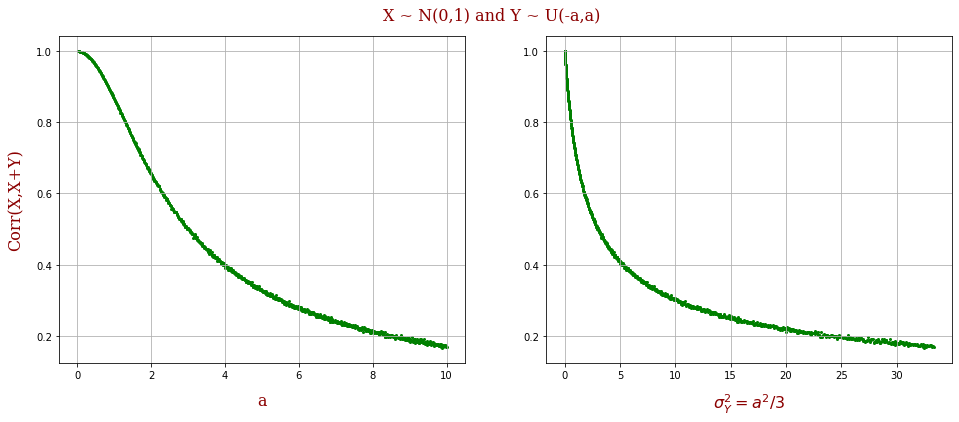

In [2]:
# X ~ N(0,1)
# Y ~ U(-a,a)

num, sample_size = 1_000, 100_000
rho_s, ps = [], []
a_s = np.linspace(0+10/num, 10, num)

for a in a_s:
    X = np.random.normal(0, 1, sample_size)
    Y = np.random.uniform(-a, a, sample_size)
    rho, p = stats.pearsonr(X, X+Y)
    rho_s.append(rho)
    ps.append(p)

fontdict = {'family':'serif', 'color':'darkred', 'weight':'normal', 'size':16}
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
plt.suptitle('X ~ N(0,1) and Y ~ U(-a,a)', y=0.95, fontdict=fontdict, size=16)

axs[0].scatter(a_s, rho_s, color='g', s=4)
axs[0].set_xlabel('a', fontdict=fontdict, labelpad=12)
axs[0].set_ylabel('Corr(X,X+Y)', fontdict=fontdict, labelpad=12)
axs[0].grid()

axs[1].scatter(a_s ** 2 / 3, rho_s, color='g', s=4)
axs[1].set_xlabel('$\sigma^2_Y = a^2/3$', fontdict=fontdict, labelpad=12)
axs[1].grid()

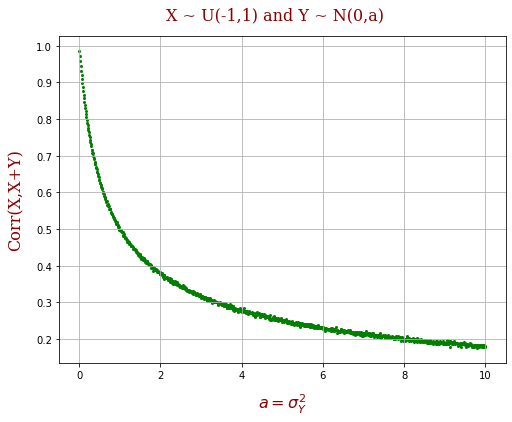

In [3]:
# X ~ U(-1,1)
# Y ~ N(0,a)

num, sample_size = 1_000, 100_000
rho_s, ps = [], []
a_s = np.linspace(0+10/num, 10, num)

for a in a_s:
    X = np.random.uniform(-1, 1, sample_size)
    Y = np.random.normal(0, np.sqrt(a), sample_size)
    rho, p = stats.pearsonr(X, X+Y)
    rho_s.append(rho)
    ps.append(p)

fontdict = {'family':'serif', 'color':'darkred', 'weight':'normal', 'size':16}
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
plt.suptitle('X ~ U(-1,1) and Y ~ N(0,a)', y=0.95, fontdict=fontdict, size=16)

axs.scatter(a_s, rho_s, color='g', s=4)
axs.set_xlabel('$a=\sigma^2_Y$', fontdict=fontdict, labelpad=12)
axs.set_ylabel('Corr(X,X+Y)', fontdict=fontdict, labelpad=12)
axs.grid()

I soon realised that I could have worked these numbers out mathematically.
$$cov(X, X+Y) = cov(X, X) + cov(X, Y) = \sigma^2_X + 0 = \sigma^2_X$$
$$\sigma^2_{X+Y} = \sigma^2_X + \sigma^2_Y + cov(X, Y) = \sigma^2_X + \sigma^2_Y$$
$$corr(X, X+Y) = \frac{cov(X, X+Y)}{\sigma_X\times \sigma_{X+Y}} = \frac{\sigma_X}{\sqrt{\sigma^2_X + \sigma^2_Y}} = \frac{1}{\sqrt{1+\left(\frac{\sigma_Y}{\sigma_X}\right)^2}}$$
For the first case, with X ~ N(0,1) and Y ~ U(-a,a), this becomes
$$corr(X, X+Y) = \frac{1}{\sqrt{1+\frac{a^2}{3}}}$$
For the second case, with X ~ U(-1,1) and Y ~ N(0,a), this becomes
$$corr(X, X+Y) = \frac{1}{\sqrt{1+3a}}$$